## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_dataset = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

# Display the data table for preview
combined_df = combined_dataset
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
num_mice = combined_dataset['Mouse ID'].count()
num_mice

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_dataset[combined_dataset.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_df = combined_df.sort_values('Mouse ID', ascending=True)
clean_dataset = combined_dataset.drop_duplicates(subset =['Mouse ID', 'Timepoint'], keep = 'first')
clean_df = clean_dataset
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
new_num_mice = clean_df['Mouse ID'].count()
new_num_mice

1888

# Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = clean_dataset.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_dataset.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_dataset.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dev = clean_dataset.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_dataset.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dev, 
                          "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
clean_dataset.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate(['mean', 'median', 'var', 'std', 'sem'])
aggregated_summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dev, 
                          "SEM": sem})
aggregated_summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

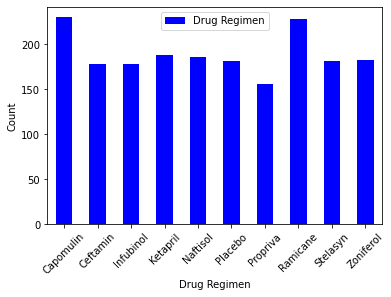

In [8]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_group = clean_dataset.groupby('Drug Regimen')
drug_group_count = pd.DataFrame(drug_group['Drug Regimen'].count())
drug_chart = drug_group_count.plot(kind='bar', color="blue")
drug_chart.set_xlabel("Drug Regimen")
drug_chart.set_ylabel("Count")
drug_chart.set_xticklabels(drug_chart.get_xticklabels(), rotation=45)
plt.show()

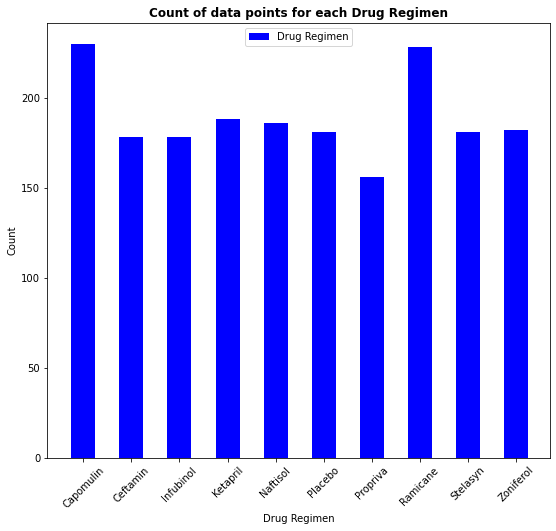

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(drug_group_count))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(9,8))
plt.bar(x_axis, drug_group_count["Drug Regimen"], color='blue', align="center", width = 0.5)
plt.xticks(tick_locations, list(drug_group_count.index), rotation="45")
plt.xlim(-0.75, len(x_axis)-0.3)
plt.ylim(0, max(drug_group_count["Drug Regimen"])*1.05)
plt.title("Count of data points for each Drug Regimen", fontweight='bold')
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
column_name = ["Drug Regimen"]
plt.legend(column_name,loc="upper center") 

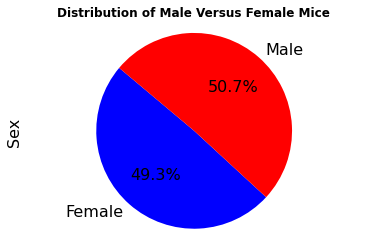

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_dataset.groupby('Sex')
gender_group_count = pd.DataFrame(gender_group['Sex'].count())
gender_group_count.plot(kind='pie', y='Sex', startangle=140,\
                        autopct='%1.1f%%', fontsize=16, colors =["blue","red"],legend =False)
plt.title("Distribution of Male Versus Female Mice", fontweight='bold')
plt.ylabel('Sex', fontsize=16)
plt.axis("equal")
plt.show()

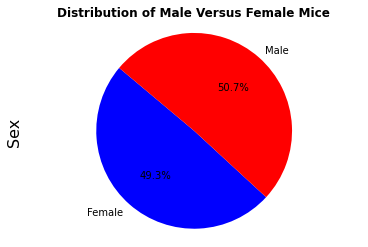

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = list(gender_group_count.index.values)
gender_counts = gender_group_count['Sex']
colors = ["blue", "red"]
plt.pie(gender_counts, labels=genders, colors=colors,
        autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Male Versus Female Mice", fontweight='bold')
plt.ylabel("Sex", fontsize=16)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# First create a subset of the combined_data dataframe where 'Drug Regimen' is
# in [Capomulin, Ramicane, Infubinol, and Ceftamin]

# Create a list of the four drugs to examine
four_drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Slice the original combined_data dataframe using the list of four drugs
four_drugs = clean_dataset[clean_dataset['Drug Regimen'].isin(four_drug_list)]

# View the newly created subset dataframe
four_drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [19]:
four_last_tumor = four_drugs.groupby(['Drug Regimen','Mouse ID']).agg(Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1]))
# View the groupby dataframe
four_last_tumor

Last_tumor_size
Drug Regimen Mouse ID                 
Capomulin    b128            38.982878
             b742            38.939633
             f966            30.485985
             g288            37.074024
             g316            40.159220
...                                ...
Ramicane     s508            30.276232
             u196            40.667713
             w678            43.166373
             y449            44.183451
             z578            30.638696

[100 rows x 1 columns]

In [20]:
# Put treatments into a list for for loop (and later for plot labels)
four_drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Reshape dataframe with Drug Regimen as columns by using unstack, also move Last_tumor_size to index using stack
four_last_tumor_unstack = four_last_tumor.stack(level=0).unstack(level=0)

# Do quartile calculations for each drug
for drug in four_drug_list:
    quartiles = four_last_tumor_unstack[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")

Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.13 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.17 
Values below 36.83 for Infubinol could be outliers.
Values above 82.75 for Infubinol could be outliers.
-----

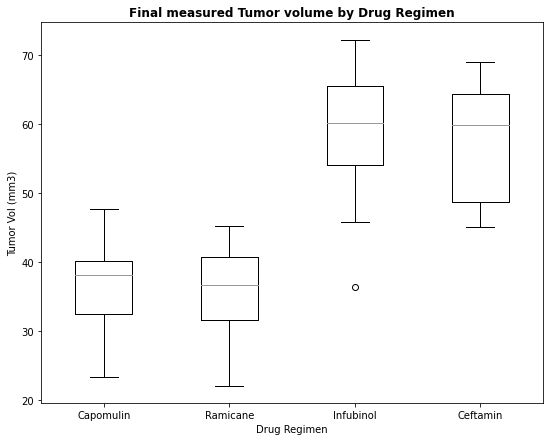

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_list = []

for drug in four_drug_list:
    boxplot_list.append(list(four_last_tumor_unstack[drug].dropna()))
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final measured Tumor volume by Drug Regimen', fontweight='bold')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(boxplot_list)
plt.xticks([1,2,3,4],four_drug_list)
plt.show()

## Line and Scatter Plots

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = clean_dataset.loc[clean_dataset['Drug Regimen'] == 'Capomulin']
capomulin_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [23]:
# Grab a mouse to plot:
capo_mouse = capomulin_data.loc[capomulin_data["Mouse ID"] == "s185"]
capo_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


Text(0, 0.5, 'Tumor Volume (mm3)')

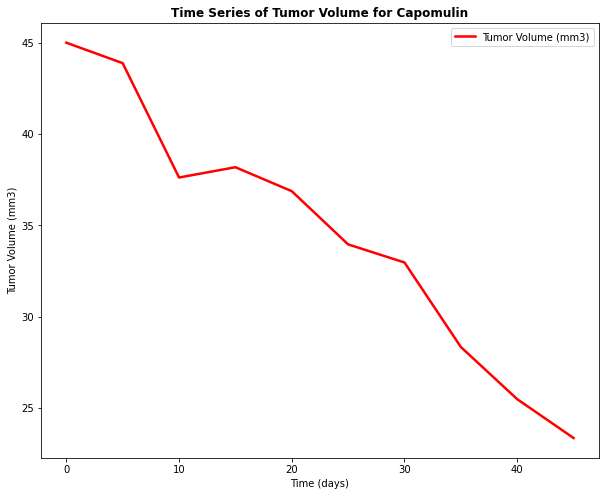

In [24]:
# Arrange data into two columns
capo_mouse = capo_mouse.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
# Generate a line plot showing the tumor volume for mice treated with Capomulin
capo_mouse.set_index("Timepoint").plot(figsize=(10,8), linewidth=2.5, color="red")
# Add the descriptive title, x labels and y labels
plt.title("Time Series of Tumor Volume for Capomulin", fontweight='bold')
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight_df = capomulin_data.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
weight_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
10,s185,17,45.000000
11,s185,17,43.878496
12,s185,17,37.614948
13,s185,17,38.177232
14,s185,17,36.866876


In [26]:
# Get the average tumor volume for each mouse under the use of Capomulin
avg_capo = pd.DataFrame(weight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_capo = avg_capo.rename(columns={"Tumor Volume (mm3)": "Tumor Volume (mm3)"})
avg_capo.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


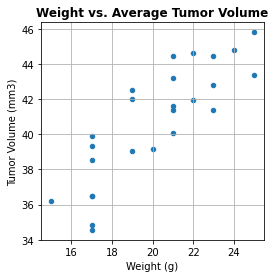

In [27]:
avg_capo.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(4,4))
plt.title("Weight vs. Average Tumor Volume", fontweight='bold')
plt.show()

## Correlation and Regression

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_capo['Weight (g)'],avg_capo['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


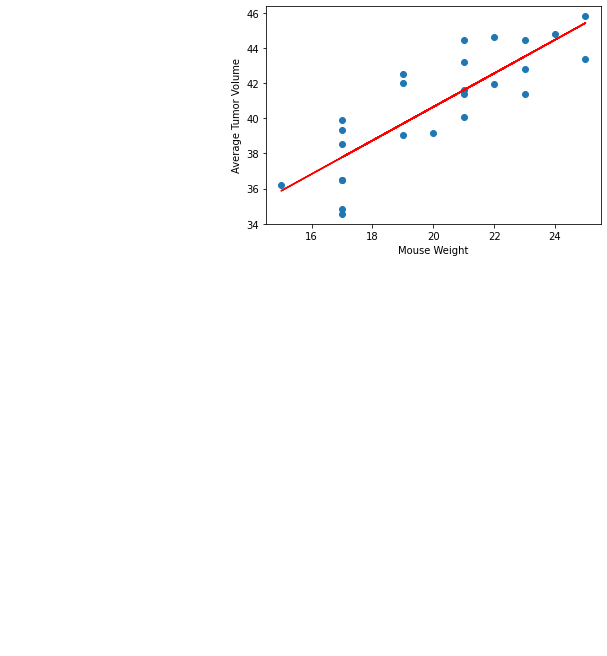

In [29]:
# Add the lineear regression equation and line to the scatter plot
from scipy.stats import linregress
x_values = avg_capo["Weight (g)"]
y_values = avg_capo["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()